## Kernel Density Estimation
Source: http://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#example-neighbors-plot-digits-kde-sampling-py

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV

In [2]:
# load digits
digits = load_digits()
data = digits.data

In [3]:
# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

In [4]:
# Use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1,1,20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

GridSearchCV(cv=None, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': array([  0.1    ,   0.12743,   0.16238,   0.20691,   0.26367,   0.33598,
         0.42813,   0.54556,   0.69519,   0.88587,   1.12884,   1.43845,
         1.83298,   2.33572,   2.97635,   3.79269,   4.83293,   6.15848,
         7.8476 ,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [5]:
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

best bandwidth: 3.79269019073225


In [6]:
# use the best estimator
kde = grid.best_estimator_

In [7]:
# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4,11,-1))

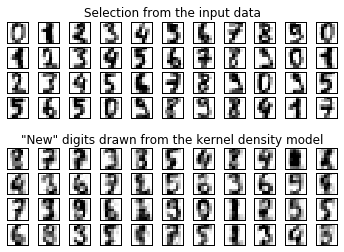

In [12]:
# plot real digits and resampled digits

fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.figure(figsize=(12,8))
plt.show()